In [1]:
# making a plot with simplified data
import pandas as pd
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

In [20]:
#import students current cases data sheet
students = pd.read_csv("data/students.csv")

In [21]:
students.head()

,Location,date,solation_cases,cases_to_date,contact_notifications
0,Highland Park,9/5/21,7,19,130
1,Richmond,9/5/21,2,13,105
2,Sangre Ridge,9/5/21,3,10,164
3,Skyline,9/5/21,15,21,273
4,Westwood,9/5/21,5,9,116


In [22]:
#make schools the index
students.Location.unique()

array(['Highland Park', 'Richmond', 'Sangre Ridge', 'Skyline', 'Westwood',
       'Will Rogers', 'SMS', 'SJHS', 'SHS', 'Lincoln Academy',
       'Virtual Academy', 'Facilities', 'Child Nutrition***',
       'Transportation', 'Technology', 'Central Office',
       'Other (Multiple sites)'], dtype=object)

In [24]:
students["date"] = pd.to_datetime(students["date"])
students["date"]

0    2021-09-05
1    2021-09-05
2    2021-09-05
3    2021-09-05
4    2021-09-05
        ...    
80   2021-09-04
81   2021-09-04
82   2021-09-04
83   2021-09-04
84   2021-09-04
Name: date, Length: 85, dtype: datetime64[ns]

In [25]:
students.head()

,Location,date,solation_cases,cases_to_date,contact_notifications
0,Highland Park,2021-09-05,7,19,130
1,Richmond,2021-09-05,2,13,105
2,Sangre Ridge,2021-09-05,3,10,164
3,Skyline,2021-09-05,15,21,273
4,Westwood,2021-09-05,5,9,116


In [37]:
#get rid of locations that aren't schools
schools = students["Location"].isin(['Highland Park', 'Richmond', 'Sangre Ridge', 'Skyline', 'Westwood',
       'Will Rogers', 'SMS', 'SJHS', 'SHS', 'Lincoln Academy',
       'Virtual Academy'])
schools = students[schools]

In [39]:
schools.head()


,Location,date,solation_cases,cases_to_date,contact_notifications
0,Highland Park,2021-09-05,7,19,130
1,Richmond,2021-09-05,2,13,105
2,Sangre Ridge,2021-09-05,3,10,164
3,Skyline,2021-09-05,15,21,273
4,Westwood,2021-09-05,5,9,116


In [54]:
isolation = schools.pivot(index="date", columns="Location", values="solation_cases")
cases = schools.pivot(index="date", columns="Location", values="cases_to_date")
notifications = schools.pivot(index="date", columns="Location", values="contact_notifications")

In [95]:
#plot dictionary for combined plots
plot_kwargs={'fontsize':20,
            'colormap':'Accent',
            'linewidth':4} #how to pass a list of markers?

<Figure size 432x288 with 0 Axes>

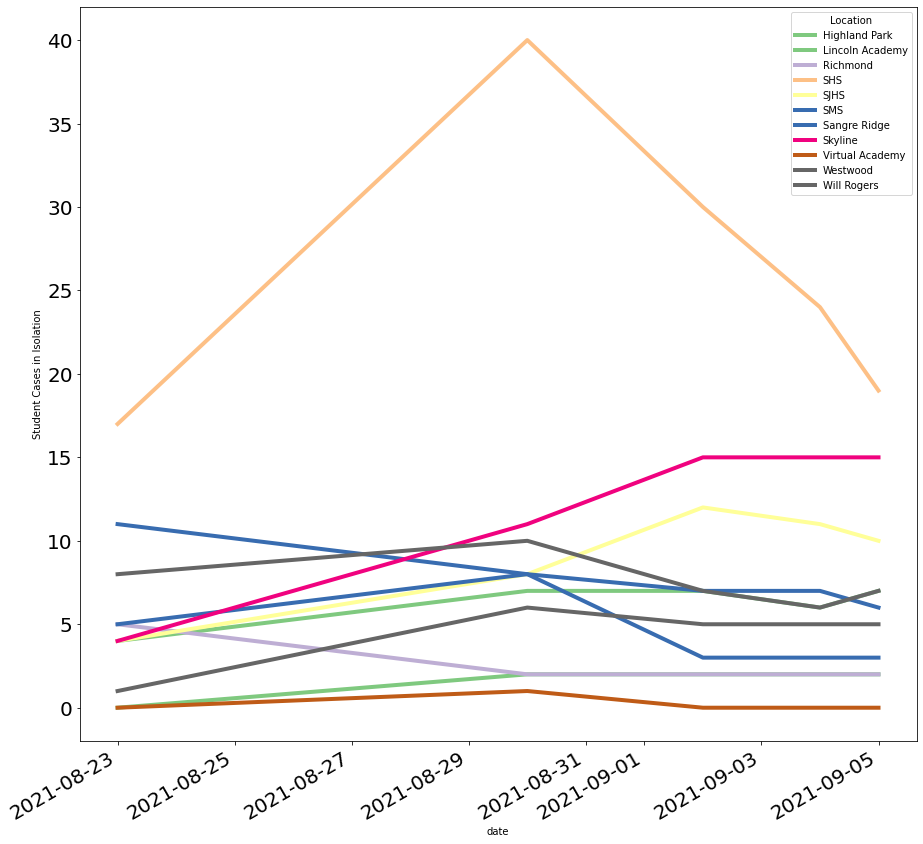

In [96]:
plt.figure()
isolation.plot(ylabel="Student Cases in Isolation", **plot_kwargs, figsize=(15,15))
plt.savefig("img/all_schools_isolation.png")

<Figure size 432x288 with 0 Axes>

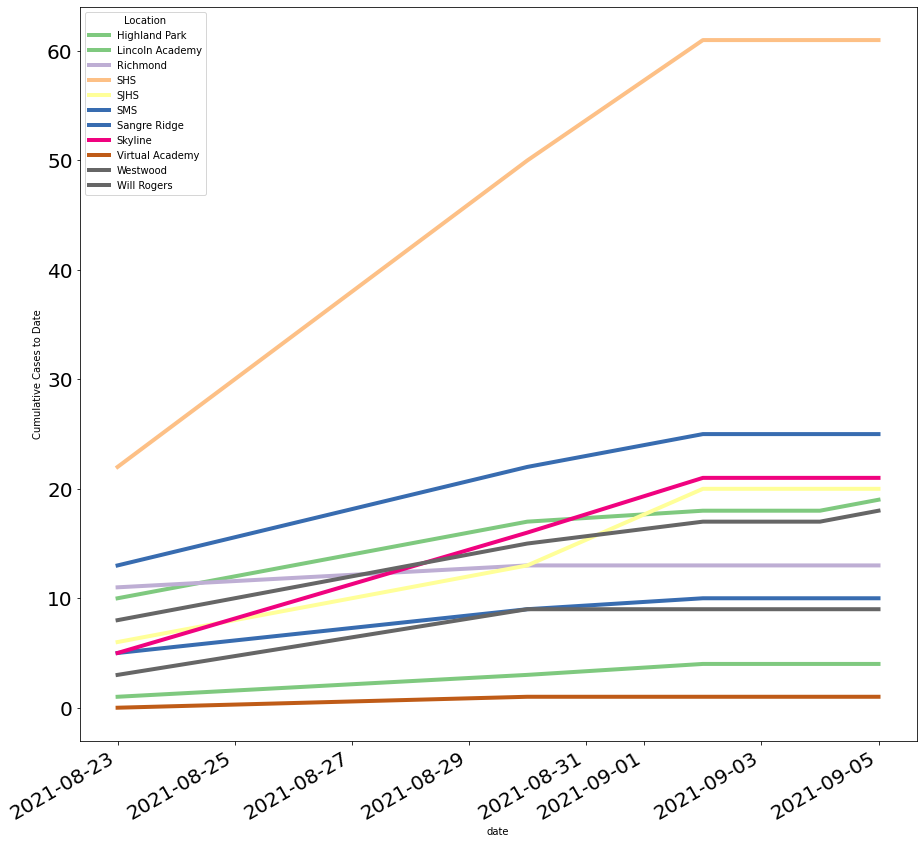

In [97]:
plt.figure()
cases.plot(ylabel="Cumulative Cases to Date", **plot_kwargs, figsize=(15,15))
plt.savefig("img/all_schools_cases.png")

<Figure size 432x288 with 0 Axes>

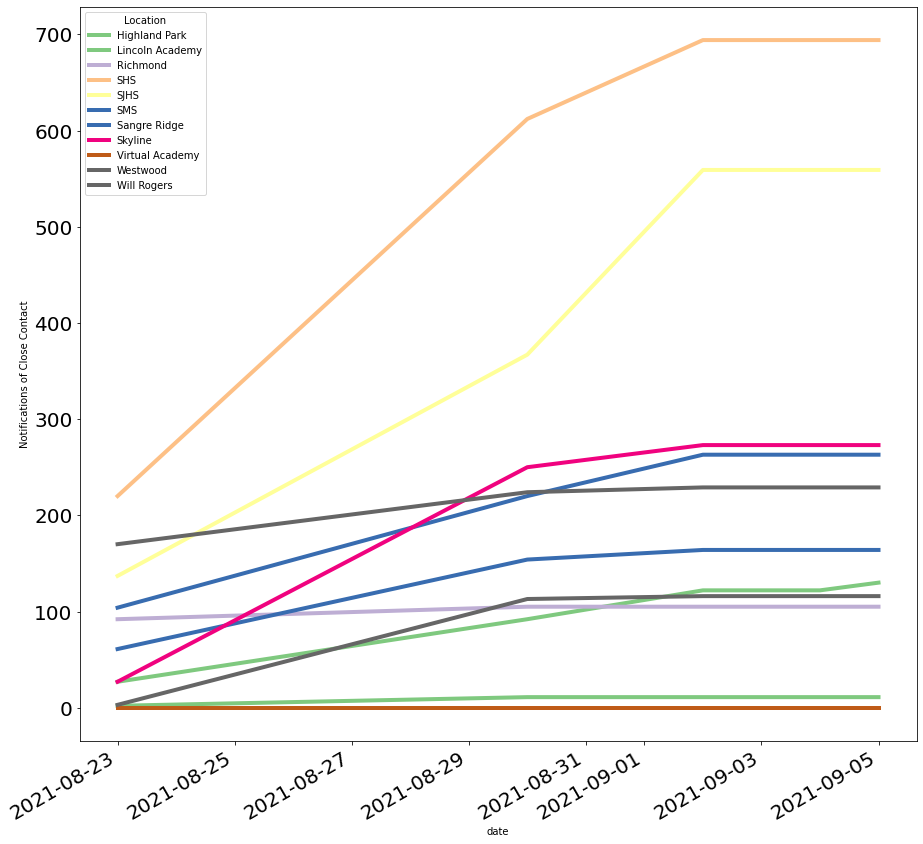

In [98]:
plt.figure()
notifications.plot(ylabel="Notifications of Close Contact", **plot_kwargs, figsize=(15,15))
plt.savefig("img/all_schools_notifications.png")

In [53]:
#isolation_all = isolation_all[0].get_figure()
#isolation_all.savefig("img/students_in_isolation.png")

TypeError: 'AxesSubplot' object is not subscriptable

<Figure size 432x288 with 0 Axes>

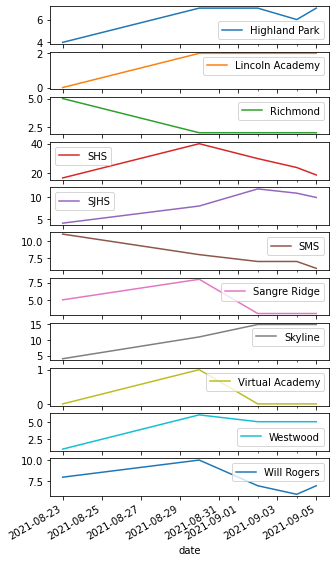

In [77]:
plt.figure();
isolation.plot(subplots=True, figsize=(5,10))
#initially used  sharey=[0,40] to make all plots have the same axis but SHS made every other school's plot a flat line
plt.savefig("img/students_in_isolation_subs.png")

<Figure size 432x288 with 0 Axes>

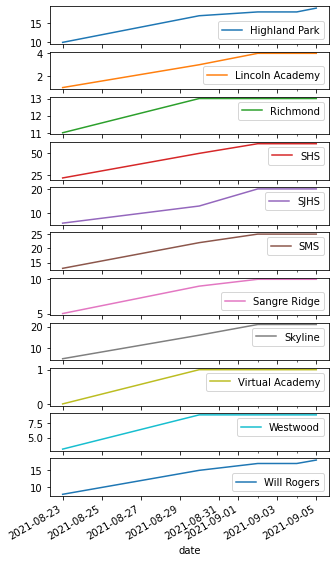

In [78]:
plt.figure();
cases.plot(subplots=True, figsize=(5,10))
#initially used  sharey=[0,40] to make all plots have the same axis but SHS made every other school's plot a flat line
plt.savefig("img/cases_to_date_subs.png")


<Figure size 432x288 with 0 Axes>

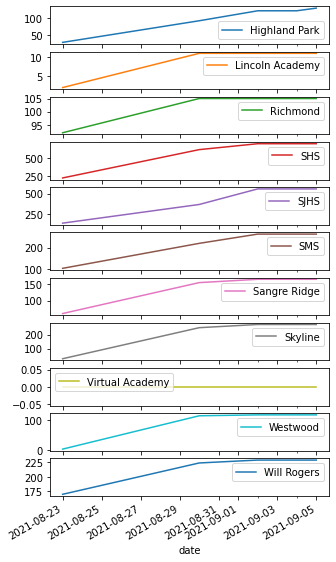

In [79]:
plt.figure();
notifications.plot(subplots=True, figsize=(5,10))
#initially used  sharey=[0,40] to make all plots have the same axis but SHS made every other school's plot a flat line
plt.savefig("img/close_contact_notifications.png")